QUESTION 1

Load the trips table into a dataframe.

Make 4 extra columns from the start_date column (We will use these in later questions):

month would contain only the month component
dayofweek would indicate what day of the week the date is
date would contain only the date component
hour would only contain the hour component

Load the trips table into a dataframe.

In [0]:
import pandas as pd

trips = pd.read_csv('trip.csv')

Preview the data

In [4]:
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [5]:
trips['start_date'].dtype

dtype('O')

Convert the start_date column to a datetime to make creating the new columns easier

trips['start_date'] = pd.to_datetime(trips['start_date'])

Make 4 extra columns from the start_date column (We will use these in later questions):

month would contain only the month component
dayofweek would indicate what day of the week the date is
date would contain only the date component
hour would only contain the hour component

In [0]:
trips['month'] = trips['start_date'].dt.month
trips['dayofweek'] = trips['start_date'].dt.dayofweek
trips['date'] = trips['start_date'].dt.date
trips['hour'] = trips['start_date'].dt.hour

QUESTION 2

Group the bike rides by month and count the number of users per month. Plot the number of users for each month. What do you observe? Provide a likely explanation to your observation. Real life data can often be messy/incomplete and cursory EDA is often able to reveal that.
*italicized text*

In [0]:
#Creating new table to count users per month
users_per_m = trips[['month','id']].groupby('month').count()
#Changing the 'id' label to make the chart more clear
users_per_m.rename(columns={'id':'user_count'},inplace=True)

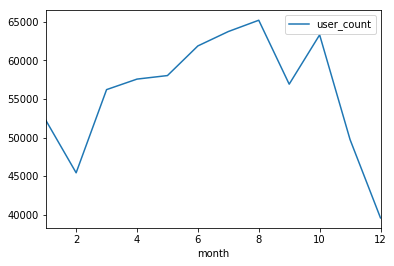

In [12]:
users_per_m.plot()

Based on the plot, there are generally more users during the warmer months. This makes sense because people typically prefer being exposed to the outdoor climate when it is warmer. The only exception is in October when there is a spike after the user count dipped in September. This may have been caused by something specific to the area such as Fall festivals or something similar and would need further investigation.

QUESTION 3

Plot the daily user count from September to December. Mark the mean and mean +/- 1.5 * Standard Deviation as horizontal lines on the plot. This would help you identify the outliers in your data. Describe your observations.



In [0]:
#modify the datatype to datetime to make easier to work with
trips['date']=pd.to_datetime(trips['date'])

In [0]:
#create new dataframe to group users by date(or day) to get user count per day
u_by_d = trips[['date','id']].groupby('date').count()
u_by_d.rename(columns={'id':'user_count'},inplace=True)

#create new dataframe with daily user counts in september through december
sept_to_dec = u_by_d['2013-09-01':'2013-12-31']

s_d_mean = sept_to_dec['user_count'].mean()
s_d_std = sept_to_dec['user_count'].std()

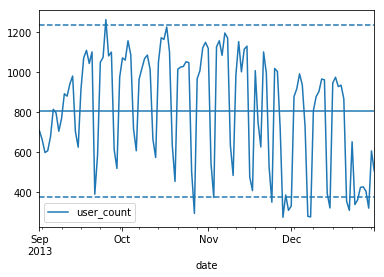

In [15]:
s_d_plt = sept_to_dec.plot()
#add mean and standard deviation bounds to chart
s_d_plt.axhline(y=s_d_mean)
s_d_plt.axhline(y=s_d_mean+(s_d_std*1.5),linestyle='--')
s_d_plt.axhline(y=s_d_mean-(s_d_std*1.5),linestyle='--')

The plot of the daily number of users for September through December reveals a couple of interesting observations. The first is that the data has a weekly pattern. There are five days of high usage followed by two days of relatively low usage, which would seem to indicate that there is high usuage during the work week and lower usage on the weekends. This would have to be confirmed with more investigation. The other item worth noting, is that when looking at multiple months at a time, the low points in December all dip below the 1.5 standard deviations from the mean. This would indicate they are outliers, but in reality those data points likely depict a typical December weekend. With this understanding, it may make more sense to look at individual months when trying to determine outliers.
It is always worth noting that there is an outlier on the high end in September. This may have happened for a number of reasons including particulary nice weather, a popular even that drew in more people than normal, or even a traffic jam that led people to use bikes that would otherwise have driven.

QUESTION 4

Plot the distribution of the daily user counts for all months as a histogram. Comment on the distribution you see and explain why the distribution might be shaped as such.

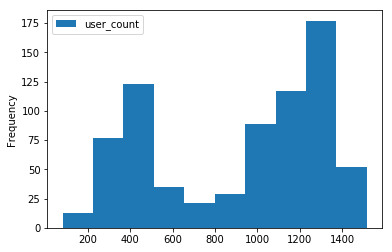

In [16]:
u_by_d.plot(kind='hist')

This histigram is showing a bimodal dataset. One explanation could be that the two peaks are the seasonal modes. The lower of the peaks is the typical number of users during the cooler months, and the higher of the peaks is the typical number of users during the warmer months.

QUESTION 5

Now we are going to explore hourly trends of user activity. Group the bike rides by date and hour and count the number of rides in the given hour on the given date. Make a boxplot of the hours in the day (x) against the number of users (y) in that given hour.

In [0]:
hour_group = trips[['date','hour','id']].groupby(['date','hour']).count()

In [18]:
hour_group.head()

id
date       hour     
2013-08-29 9      12
           10     14
           11     42
           12    120
           13     87

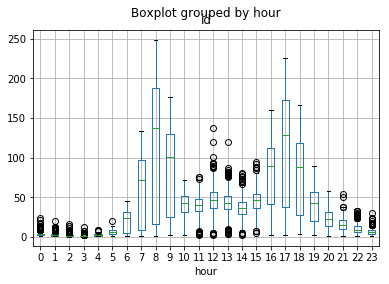

In [19]:
hour_group.reset_index(level=1).boxplot(column='id',by='hour')

QUESTION 6

Someone from the analytics team made a line plot (right) that he claims is showing the same information as your boxplot (left). What information can you gain from the boxplot that is missing in the line plot?

The box plot includes information regarding the spread of the data for each of the hours, while the line plot does not. The box plot includes information regarding the quartiles as well as outliers.

QUESTION 7

** Extra Credit **: Replot the boxplot in 6. after binning your data into weekday and weekend. Describe the differences you observe between hour user activity between weekday and weekend?

In [0]:
trips['wkday'] = trips['dayofweek'] < 5

In [0]:
trips_wkday = trips[trips['wkday']==True]
hour_group_wkday = trips_wkday[['date','hour','id']].groupby(['date','hour']).count()

trips_wknd = trips[trips['wkday']==False]
hour_group_wknd = trips_wknd[['date','hour','id']].groupby(['date','hour']).count()

Text(0.5, 0.98, '')

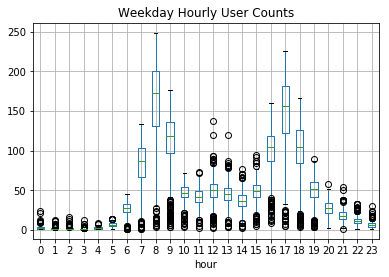

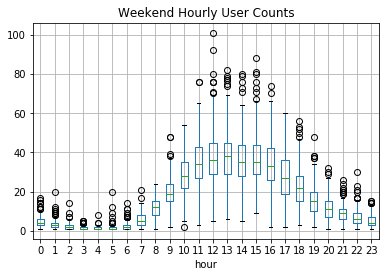

In [92]:
import matplotlib.pyplot as plt

#boxplot for weekdays
hg_wkday_plt = hour_group_wkday.boxplot(column='id',by='hour')
plt.title(label='Weekday Hourly User Counts')
plt.suptitle('')
#boxplot for weekends
hg_wknd_plt = hour_group_wknd.boxplot(column='id',by='hour')
plt.title(label='Weekend Hourly User Counts')
plt.suptitle('')

Distinct differences are noticed when comparing weekday vs weekend hourly counts of bike users. The hourly count of users during the week tends to follow traffic patterns. The data is bimodal with peaks in the morning and evening. This is likely because users are using the bikes to travel to and from work.
On the weekend, the data is more bimodal and the peak is much more gradual. The user count increases in the morning and levels off during the day before tailing off again in the evening. This is likely because users are not working and do not have as defined a schedule on the weekends.